# Python examples


## Creates

- createUser
- createMarket
- createTrade

### Create user

Creates a new user. Returns signature and verify keys.

~~~~
baseurl = 'https://https://blocmarket.herokuapp.com/'
url = baseurl +'createUser'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example return as json:

~~~~
{'signingKey_hex': '0cca0a3739eba76cc78823d9f6e898379014d8c53172f5e45c171a3c54a9f477',
 'traderId': '1',
 'verifyKey_hex': 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'}
~~~~
        
### Create/update market

Creates/updates a market. Returns True and market details if successful. 

Specify:
- Market root and branch id
- Minimum and maximum outcomes
- Trader Id
- Sign and verify keys

Note that sending the private key is a terrible idea. In production signing is done on client side.

~~~~
sk = '0cca0a3739eba76cc78823d9f6e898379014d8c53172f5e45c171a3c54a9f477'
vk = 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'
tId = 2

content_makemarket = {"signingKey_hex": sk,
                    "traderId": tId, 
                    "verifyKey_hex": vk,
                    "marketRootId": 1, 
                    "marketBranchId": 1, 
                    "marketMin": 0,
                    "marketMax":1}

response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
~~~~

Example return as json:

~~~~
{'checks': 'True',
 'marketBranchId': 1,
 'marketMax': 1,
 'marketMin': 0,
 'marketRootId': 1,
 'traderId': '2'}
~~~~
    
### Create trade

Create a trade. Returns True and trade details if successful.

Specify:

- Trader Id
- Market Id
- Price
- Quantity
- Sign and verify keys

~~~~
url = baseurl+'createTrade'

content_maketrade = {"signingKey_hex": sk,
                     "traderId": tId,
                     "verifyKey_hex": vk,
                     "marketId": mkId,
                     "price": 0.55,
                     "quantity":1}

response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
~~~~

Example return as json:
~~~~
{'checks': 'True',
 'marketId': 1,
 'price': 0.55,
 'quantity': -1,
 'traderId': '2'}
~~~~

## Views

- viewMarketBounds
- viewOrderBook
- viewOpenTrades
- viewMatchedTrades

### View markets

~~~~
url = baseurl+'viewMarketBounds'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":2,"2":3,"3":4},"marketRootId":{"0":1,"1":2,"2":3,"3":4},"marketBranchId":{"0":1,"1":1,"2":1,"3":1},"marketMin":{"0":0.0,"1":0.0,"2":0.0,"3":0.0},"marketMax":{"0":0.7,"1":0.7,"2":0.7,"3":0.7}}'
~~~~

### View full order book

~~~~
url = baseurl+'viewOrderBook'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1,"2":1},"price":{"0":0.55,"1":0.55,"2":0.55},"quantity":{"0":1.0,"1":-1.0,"2":-1.0},"traderId":{"0":1,"1":1,"2":1},"iMatched":{"0":true,"1":true,"2":true},"timeStampUTC":{"0":1547976585838,"1":1547976602766,"2":1547976613155}}'
~~~~

### View open trades

~~~~
url = baseurl+'viewOpenTrades'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

~~~~
'{"marketId":{"12":1,"15":1,"18":1,"21":1,"24":1},"price":{"12":0.43,"15":0.43,"18":0.43,"21":0.43,"24":0.43},"quantity":{"12":-1.0,"15":-1.0,"18":-1.0,"21":-1.0,"24":-1.0},"traderId":{"12":1,"15":1,"18":1,"21":1,"24":1},"timeStampUTC":{"12":1547976742476,"15":1547976750344,"18":1547976758683,"21":1547976768968,"24":1547976775537}}'
~~~~

### View matched trades

~~~~
url = baseurl+'viewMatchedTrades'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1},"price":{"0":0.43,"1":0.55},"quantity":{"0":0.0,"1":0.0},"traderId":{"0":1,"1":1}}'

~~~~

### View trader summary

A view joining order book and marketTable for a particular trader.

~~~~
url = baseurl+'viewTradeSummary'
content = {'traderId': 2}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1},"price":{"0":0.8,"1":0.5},"quantity":{"0":-1.0,"1":-1.0},"traderId":{"0":2,"1":2},"iMatched":{"0":false,"1":true},"timeStampUTC":{"0":1547982939316,"1":1547982938964},"marketMin":{"0":0.0,"1":0.0},"marketMax":{"0":1.0,"1":1.0}}'
~~~~


# Python demonstration

In [1687]:
import requests
import json
import numpy as np
import pandas as pd
import time

%matplotlib inline
import matplotlib.pyplot as plt

# Running flask app from powershell
# $env:FLASK_APP = "api"
# $env:FLASK_ENV = "development"
# flask run

# Running flask from terminal on OSX
# export FLASK_APP=api
# export FLASK_ENV=development
# flask run

# Running with gunicorn (heroku, digitalocean, etc):
# Procfile >
# web: gunicorn wsgi --log-file -
# wsgi.py >
# from api import app as application
#
#if __name__ == "__main__":
#    application.run()

# https://devcenter.heroku.com/articles/getting-started-with-python
# https://www.digitalocean.com/community/tutorials/how-to-serve-flask-applications-with-gunicorn-and-nginx-on-ubuntu-14-04


In [1706]:
#  baseurl = 'https://vast-depths-89393.herokuapp.com/'
# baseurl = 'https://glacial-hollows-90395.herokuapp.com/'
#baseurl = 'https://blocmarket.herokuapp.com/'
#baseurl = 'http://127.0.0.1:5000/'
baseurl = 'http://127.0.0.1:7000/'

In [1741]:
url = baseurl +'createUser'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [1742]:
response.json()

{'signingKey_hex': '453567714335dbc785ccc202d6874bdf52ac46c5a24e321606fa2aba8109aaf5',
 'traderId': '1',
 'verifyKey_hex': 'b8ce28234e29a496aa8b89ae713d0e7b05e9790786fc8ec6b5b162a90bcb44b2'}

In [1743]:
url = baseurl + 'createMarket'

mkRtId = 7
mkId=1
# copy from response
sk = response.json()['signingKey_hex']
vk = response.json()['verifyKey_hex']
tId = response.json()['traderId']

In [1744]:
content_makemarket = {"signingKey_hex": sk,
                    "traderId": int(tId), 
                    "verifyKey_hex": vk,
                    "marketRootId": mkRtId, 
                    "marketBranchId": 1, 
                    "marketMin": 0.1,
                    "marketMax":0.9}

response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)

In [1745]:
response.json()

{'allChecks': "{'marketId': '1', 'marketRangeChk': True, 'sigChk': True, 'chainChk': True, 'ownerChk': True, 'timeChk': True}",
 'checks': 'True',
 'marketBranchId': 1,
 'marketId': 1,
 'marketMax': 0.9,
 'marketMin': 0.1,
 'marketRootId': 7,
 'traderId': 1}

In [1747]:
# Save market id from response
mkId = response.json()['marketId']


1

In [1748]:
pd.DataFrame(response.json(), index=[0])

,allChecks,checks,marketBranchId,marketId,marketMax,marketMin,marketRootId,traderId
0,"{'marketId': '1', 'marketRangeChk': True, 'sig...",True,1,1,0.9,0.1,7,1


In [1749]:
# Create a trade
url = baseurl+'createTrade'

content_maketrade = {"signingKey_hex": sk,
                     "traderId": int(tId),
                     "verifyKey_hex": vk,
                     "marketId": mkId,
                     "price": 0.55,
                     "quantity":1}
# Post trade
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)

In [1750]:
response.json()

{'allChecks': "{'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 1,
 'price': 0.55,
 'quantity': 1,
 'traderId': 1}

In [1751]:
# View json response
pd.DataFrame(response.json(), index=[0])


,allChecks,checks,marketId,price,quantity,traderId
0,"{'marketChk': True, 'sigChk': True, 'chainChk'...",True,1,0.55,1,1


In [1752]:
# Create a matched trade
url = baseurl+'createTrade'
content_maketrade['quantity'] = -1
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)

In [1753]:
response.json()

{'allChecks': "{'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 1,
 'price': 0.55,
 'quantity': -1,
 'traderId': 1}

In [1754]:
# Create many matched trades
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    content_maketrade['quantity']=1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('matched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


matched trade: 0 in 0.3625321388244629 seconds.
matched trade: 1 in 0.39667725563049316 seconds.
matched trade: 2 in 0.38875794410705566 seconds.
matched trade: 3 in 0.35074615478515625 seconds.
matched trade: 4 in 0.34383201599121094 seconds.


In [1755]:
url = baseurl+'createMarket'

for i in range(4):
    t = time.time()

    content_makemarket = {"signingKey_hex": sk,
      "traderId": int(tId), "verifyKey_hex": vk,
      "marketRootId": i+1, "marketBranchId": 1, "marketMin": 0, "marketMax":0.7}

    response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
    if response.json()['checks'] == 'True':
        print('market created: ' + str(i+1) + ' in ' + str(time.time() - t) + ' seconds.')
    else:
        print('failed to create market ' +str(i+1))
    

market created: 1 in 0.2735402584075928 seconds.
market created: 2 in 0.3729438781738281 seconds.
market created: 3 in 0.6626698970794678 seconds.
market created: 4 in 1.3907649517059326 seconds.


In [1756]:
response.json()

{'allChecks': "{'marketId': '5', 'marketRangeChk': True, 'sigChk': True, 'chainChk': True, 'ownerChk': True, 'timeChk': True}",
 'checks': 'True',
 'marketBranchId': 1,
 'marketId': 5,
 'marketMax': 0.7,
 'marketMin': 0,
 'marketRootId': 4,
 'traderId': 1}

In [1757]:
url = baseurl+'viewMarketBounds'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)


In [1758]:
a = pd.read_json(response.json())
a

,marketId,marketRootId,marketBranchId,marketMin,marketMax
0,1,7,1,0.1,0.9
1,2,1,1,0.0,0.7
2,3,2,1,0.0,0.7
3,4,3,1,0.0,0.7
4,5,4,1,0.0,0.7


In [1759]:
url = baseurl+'viewOrderBook'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [1760]:
a = pd.read_json(response.json())
a

,marketId,price,quantity,traderId,iMatched,timeStampUTC
0,1,0.55,1,1,True,2019-01-26 04:23:11.246
1,1,0.55,-1,1,True,2019-01-26 04:23:16.237
10,1,0.55,-1,1,True,2019-01-26 04:23:21.902
11,1,0.55,1,1,True,2019-01-26 04:23:22.072
2,1,0.55,-1,1,True,2019-01-26 04:23:20.421
3,1,0.55,1,1,True,2019-01-26 04:23:20.592
4,1,0.55,-1,1,True,2019-01-26 04:23:20.755
5,1,0.55,1,1,True,2019-01-26 04:23:20.983
6,1,0.55,-1,1,True,2019-01-26 04:23:21.197
7,1,0.55,1,1,True,2019-01-26 04:23:21.377


In [1761]:
# Create many unmatched trades
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    content_maketrade['price'] = 0.43
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('unmatched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


unmatched trade: 0 in 1.4002459049224854 seconds.
unmatched trade: 1 in 1.2965281009674072 seconds.
unmatched trade: 2 in 1.250774621963501 seconds.
unmatched trade: 3 in 1.2655417919158936 seconds.
unmatched trade: 4 in 1.228057622909546 seconds.


In [1762]:
a = response.json()
a

{'allChecks': "{'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 1,
 'price': 0.43,
 'quantity': -1,
 'traderId': 1}

In [1763]:
url = baseurl+'viewOpenTrades'

content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [1764]:
pd.read_json(response.json())

,marketId,price,quantity,traderId,timeStampUTC
12,1,0.43,-1,1,2019-01-26 04:24:09.352
13,1,0.43,-1,1,2019-01-26 04:24:10.649
14,1,0.43,-1,1,2019-01-26 04:24:11.899
15,1,0.43,-1,1,2019-01-26 04:24:13.166
16,1,0.43,-1,1,2019-01-26 04:24:14.393


In [1765]:
url = baseurl+'viewMatchedTrades'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [1766]:
pd.read_json(response.json())

,marketId,price,quantity,traderId
0,1,0.55,0,1


In [1767]:
# Create many matched trades
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    content_maketrade['quantity']=1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('matched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


matched trade: 0 in 2.766700029373169 seconds.
matched trade: 1 in 2.5861189365386963 seconds.
matched trade: 2 in 2.5862152576446533 seconds.
matched trade: 3 in 2.5115320682525635 seconds.
matched trade: 4 in 2.526761293411255 seconds.


In [1768]:
url = baseurl+'viewTradeSummary'
content = {'traderId': int(tId)}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [1769]:
pd.read_json(response.json())

,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
0,1,0.55,1,1,True,2019-01-26 04:23:11.246,0.1,0.9,-0.45,0.35
1,1,0.55,-1,1,True,2019-01-26 04:23:16.237,0.1,0.9,0.45,-0.35
10,1,0.55,-1,1,True,2019-01-26 04:23:21.902,0.1,0.9,0.45,-0.35
11,1,0.55,1,1,True,2019-01-26 04:23:22.072,0.1,0.9,-0.45,0.35
12,1,0.43,-1,1,False,2019-01-26 04:24:31.125,0.1,0.9,0.33,-0.47
13,1,0.43,-1,1,True,2019-01-26 04:24:09.352,0.1,0.9,0.33,-0.47
14,1,0.43,1,1,True,2019-01-26 04:24:32.581,0.1,0.9,-0.33,0.47
15,1,0.43,-1,1,False,2019-01-26 04:24:33.831,0.1,0.9,0.33,-0.47
16,1,0.43,-1,1,True,2019-01-26 04:24:10.649,0.1,0.9,0.33,-0.47
17,1,0.43,1,1,True,2019-01-26 04:24:35.165,0.1,0.9,-0.33,0.47


In [1770]:
url = baseurl+'getSignedUTCTimestamp'
content = {}
response = requests.get(url, data=json.dumps(content), headers=headers)


In [1771]:
response.json()

{'timeStampUTC': '2019-01-26 04:24:56.567789',
 'timeStampUTCSignature': 'b"D\\xae\\xb9\\x87(\\xd0m\\xaa\\xd51\\xd7C\\x16\\xa6\\xf7b\\xfa\\x82\\x83\\x83\\x96\'\\xbf9\\xda\\xfc3\\xbf\\x81x\\xd2\\xa9\\xc9B\\xbfj\\xf0Gn\\xf4\\x8fvO_\\xa41\\xber\\x05z\\x9aYO\\x1a\\xab\\xf8\\xfb<\\xafAPC\\x90\\x08"',
 'verifyKey': 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'}

In [1772]:
# A simple bot
url = baseurl+'createTrade'
content_maketrade['quantity'] = 1
B = 0
for i in range(10):
    # Create bounded random betwen zero and one
    dW = np.random.random()/10
    if B >0.9:
        B -= abs(dW)
    elif B <0.1:
        B += abs(dW)
    else:
        B = B + dW
    B = min(max(B, 0),1)
    # Make a bid
    content_maketrade['price'] = B-0.01
    content_maketrade['quantity'] =1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    # Make an offer
    content_maketrade['price'] = B+0.01
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    time.sleep(1)
    # Remove a bid
    content_maketrade['price'] = B-0.01
    content_maketrade['quantity'] =-1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    # Remove an offer
    content_maketrade['price'] = B+0.01
    content_maketrade['quantity'] = 1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('Increment ' + str(i) + ' at ' + str(time.time()))

Increment 0 at 1548476705.859183
Increment 1 at 1548476711.886822
Increment 2 at 1548476717.918721
Increment 3 at 1548476723.952254
Increment 4 at 1548476730.0246952
Increment 5 at 1548476736.097515
Increment 6 at 1548476742.1010718
Increment 7 at 1548476748.128324
Increment 8 at 1548476754.133198
Increment 9 at 1548476760.180204


In [1773]:

url = baseurl+'viewTradeSummary'
content = {'traderId': int(tId)}
response = requests.post(url, data=json.dumps(content), headers=headers)
a = pd.read_json(response.json())
a

,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
0,1,0.550000,1,1,True,2019-01-26 04:23:11.246,0.1,0.9,-0.450000,0.350000
1,1,0.550000,-1,1,True,2019-01-26 04:23:16.237,0.1,0.9,0.450000,-0.350000
10,1,0.550000,-1,1,True,2019-01-26 04:23:21.902,0.1,0.9,0.450000,-0.350000
11,1,0.550000,1,1,True,2019-01-26 04:23:22.072,0.1,0.9,-0.450000,0.350000
12,1,0.430000,-1,1,False,2019-01-26 04:24:31.125,0.1,0.9,0.330000,-0.470000
13,1,0.430000,-1,1,True,2019-01-26 04:24:09.352,0.1,0.9,0.330000,-0.470000
14,1,0.430000,1,1,True,2019-01-26 04:24:32.581,0.1,0.9,-0.330000,0.470000
15,1,0.430000,-1,1,False,2019-01-26 04:24:33.831,0.1,0.9,0.330000,-0.470000
16,1,0.430000,-1,1,True,2019-01-26 04:24:10.649,0.1,0.9,0.330000,-0.470000
17,1,0.430000,1,1,True,2019-01-26 04:24:35.165,0.1,0.9,-0.330000,0.470000


In [1774]:
tId

'1'

In [1775]:
a = a.set_index(a['timeStampUTC'])
a



,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
timeStampUTC,,,,,,,,,,
2019-01-26 04:23:11.246,1,0.550000,1,1,True,2019-01-26 04:23:11.246,0.1,0.9,-0.450000,0.350000
2019-01-26 04:23:16.237,1,0.550000,-1,1,True,2019-01-26 04:23:16.237,0.1,0.9,0.450000,-0.350000
2019-01-26 04:23:21.902,1,0.550000,-1,1,True,2019-01-26 04:23:21.902,0.1,0.9,0.450000,-0.350000
2019-01-26 04:23:22.072,1,0.550000,1,1,True,2019-01-26 04:23:22.072,0.1,0.9,-0.450000,0.350000
2019-01-26 04:24:31.125,1,0.430000,-1,1,False,2019-01-26 04:24:31.125,0.1,0.9,0.330000,-0.470000
2019-01-26 04:24:09.352,1,0.430000,-1,1,True,2019-01-26 04:24:09.352,0.1,0.9,0.330000,-0.470000
2019-01-26 04:24:32.581,1,0.430000,1,1,True,2019-01-26 04:24:32.581,0.1,0.9,-0.330000,0.470000
2019-01-26 04:24:33.831,1,0.430000,-1,1,False,2019-01-26 04:24:33.831,0.1,0.9,0.330000,-0.470000
2019-01-26 04:24:10.649,1,0.430000,-1,1,True,2019-01-26 04:24:10.649,0.1,0.9,0.330000,-0.470000


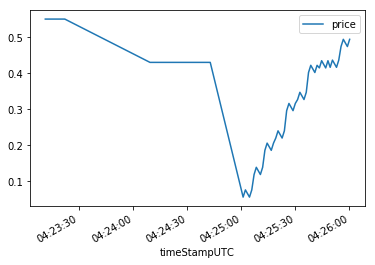

In [1776]:
plt.figure(); a['price'].plot(); plt.legend(loc='best')


# Curl examples



## Create user

~~~~
curl --header "Content-Type: application/json" -X POST http://127.0.0.1:7000/createUser
~~~~
        
## Create market

~~~~
curl --data '{"signingKey_hex": "ece2efc138c8298d43caba1315ceda614e20644c74d46fed37871c47ea19afdf",
"traderId": 1, 
"verifyKey_hex": "9690a2e12971ae452d68bf3d08405090d45791533cf80740fd186aea4b6773fc",
"marketRootId": 1, 
"marketBranchId": 5, 
"marketMin": 0, 
"marketMax": 1}' 
--header "Content-Type: application/json" -X POST http://localhost:7000/createMarket
~~~~
    
## Create trade

~~~~
curl --data '{"signingKey_hex": "ece2efc138c8298d43caba1315ceda614e20644c74d46fed37871c47ea19afdf",
"traderId": 1, 
"verifyKey_hex": "9690a2e12971ae452d68bf3d08405090d45791533cf80740fd186aea4b6773fc",
"marketId": 1,
"price": 0.1212,
"quantity": 1}' --header "Content-Type: application/json" -X POST http://localhost:7000/createTrade

~~~~
        
## View order book (output to file)

~~~~
curl --header "Content-Type: application/json" -X POST http://127.0.0.1:7000/viewOrderBook --output ob.txt
~~~~    
        
Also can load json from file with something like 
~~~~ 
curl -d "@data.json" -X POST http://localhost:3000/data 
~~~~

Matlab will (probably?) run these with 
~~~~
[A, curlout] = system('curlstring')
~~~~

    

# Setup for release

- Get extra database rows on Heroku
- Single 